# Data Visualization

## R's main graphics packages

R has different graphics packages for various applications:

* `graphics`: R's base graphics package
* `grid` : R's low level graphics system
* `lattice`: R's trellis plotting package
* `ggplot2` : Currently R' most popular graphics package
* `rgl` : 3D real-time rendering system for R

In this course only the `graphics` and `ggplot2` package are covered in this course.

## Plotting with the graphics package

In [85]:
options(repr.plot.width = 6, repr.plot.height = 5)
require(data.table)

### Points and lines

In R **formulas** are specified with the `~` operator. The `plot` function is a base graphics workhorse plotting function and can accept formulas or `x` and `y` comma separated variables.

In [91]:
# Create the data
gen_points <- function(x)
    cumsum(runif(x, -1, 1))
n <- 50
x <- 1:n
set.seed(4)
y <- gen_points(n)

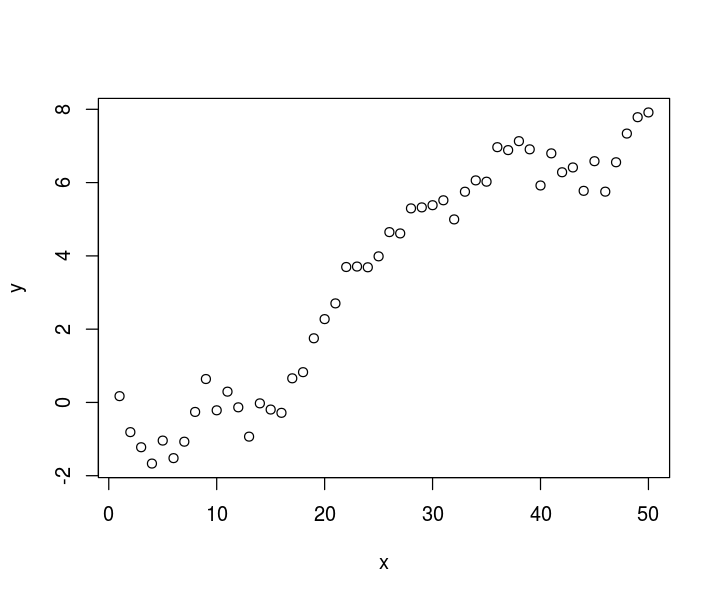

In [92]:
# Scatter plot
plot(y ~ x)

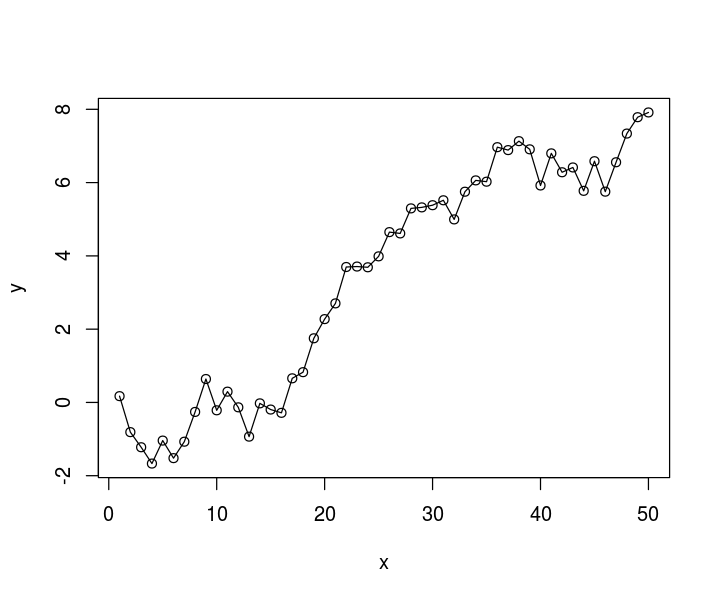

In [93]:
# Points then lines
plot(y ~ x, type = "p")
lines(y ~ x)

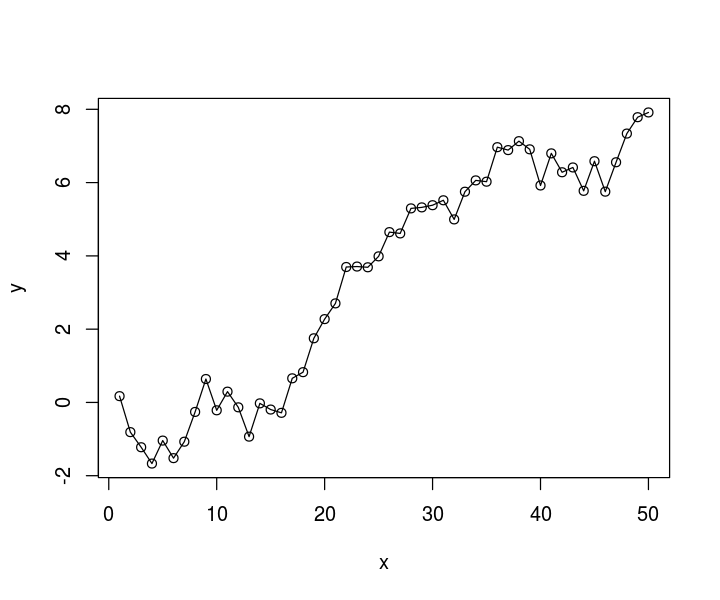

In [94]:
# Lines lines then points
plot(y ~ x, type = "l")
points(y ~ x)

# Exercise 2.4

**Question 1**

Write a function `gen_points(n)` that creates points by taking a cumulative sum (`cumsum`) of `n` points generated from a normal distribution with mean `0.3` and sd `1.0`.

Create a data.frame `pdat` with columns `x` and `y`, where `x` contains numbers `1` to `50` and `y` contains `50` numbers generates using your `gen_points` function.

**The `plot` function can plot `data.frames`** directly. Plot `pdat` using the plot function.

**Question 2**

Change the plot you created in **Question 1** by modifying the `type` parameter to `"b"`. **Create a new window by using the `X11()`** command and modify the `type` parameter to `"o"` and re-plot. What is the difference between the two options? You may need to reside the windows to see the difference.

Change the plot `type` to `c`. What does this do?. Now re-plot the points using the `points` funciton with the option `pch = 20`. The `pch` parameter allows the plot symbol to be changed. This will be revisited later.

**Question 3**

The `plot` function can be used for much more than plotting points and lines. Change the plot that you created in **Question 2** by changing `type` to `"s"`. Now create another window and plot again changing `type` to `"S"`. What is the difference between these two plots? Hint: use the `?plot` function.

Change the plot `type` to `"h"` - this creates a plot with horizontal lines. Now changed the `lwd` parameter to `20` and the `col` parameter to "brown". These are the line with and colour parameters that we will be revisiting later.

### Plotting data

In [96]:
house <- fread("../data/houseprices/train.csv")

In [3]:
print(house[1:2,])

   Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1:  1         60       RL          65    8450   Pave    NA      Reg         Lvl
2:  2         20       RL          80    9600   Pave    NA      Reg         Lvl
   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType
1:    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam
2:    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam
   HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd RoofStyle RoofMatl
1:     2Story           7           5      2003         2003     Gable  CompShg
2:     1Story           6           8      1976         1976     Gable  CompShg
   Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual ExterCond Foundation
1:     VinylSd     VinylSd    BrkFace        196        Gd        TA      PConc
2:     MetalSd     MetalSd       None          0        TA        TA     CBlock
   BsmtQual BsmtCond BsmtExposure BsmtFinType1 Bs

### Scatter plots

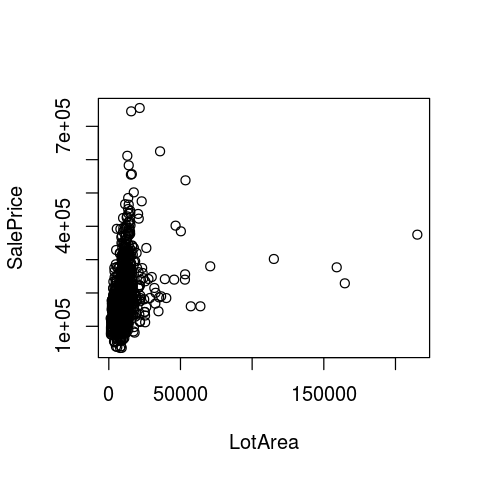

In [4]:
# plot function used with formula style
plot(SalePrice ~ LotArea, data = house)

The `with` function allows an expresssion to be evaluated in an environment - in this case the `data.table` `house`.

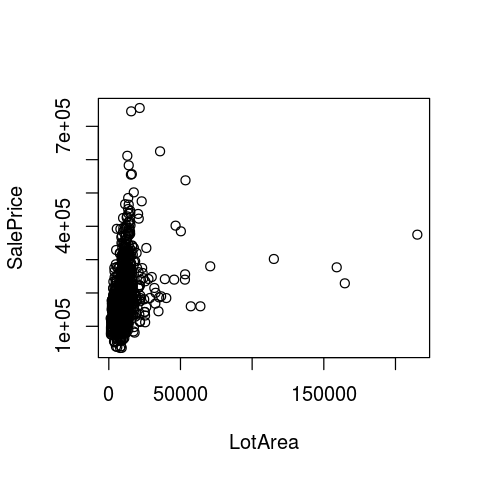

In [78]:
# plot function used with the comma style
#  Comma style needs access to the names for plotting
with(house, plot(LotArea, SalePrice))

### Setting the plot ranges

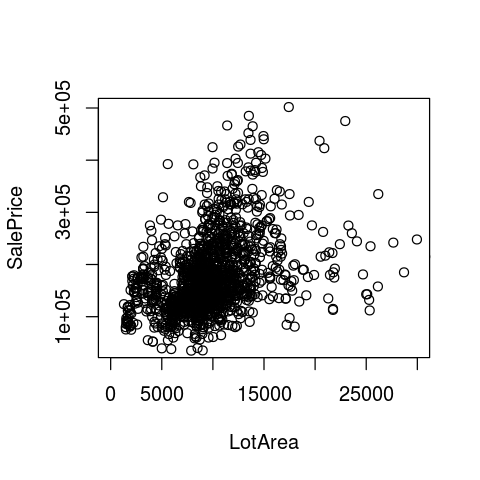

In [6]:
# We can set the x and y ranges
plot(SalePrice ~ LotArea, data = house, xlim = c(0, 3E4), ylim = c(4E4, 5E5))

### Setting the plot symbol, title, and axes labels

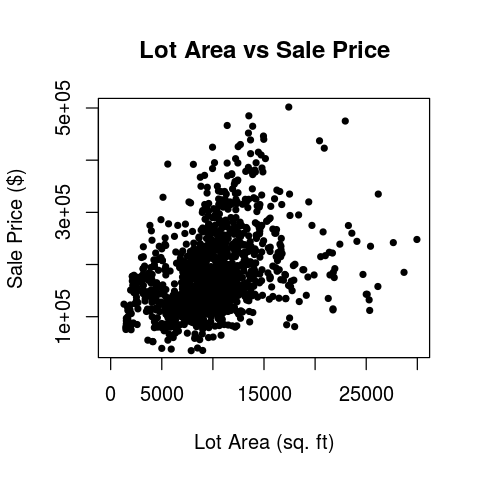

In [7]:
# Change the point style with the `pch` shape parameter, `main` for title
#   `xlab` and `ylab` for axes labels
plot(SalePrice ~ LotArea, data = house, 
                    xlim = c(0, 3E4), ylim = c(4E4, 5E5), 
                    pch = 20, main = "Lot Area vs Sale Price",
                    xlab = "Lot Area (sq. ft)", ylab = "Sale Price ($)")

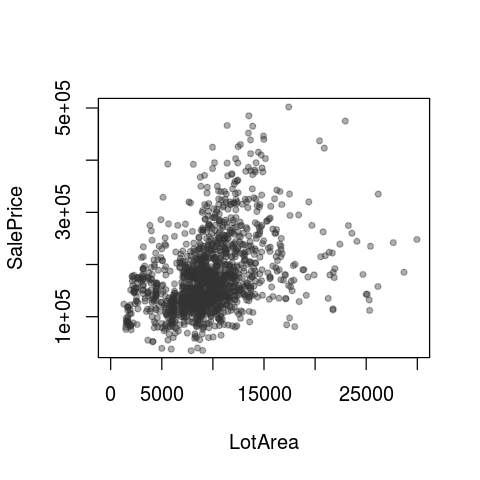

In [8]:
# Set colour using the `col` variable
# The rgb() function generates colours and allows alpha transparency to be set
plot(SalePrice ~ LotArea, data = house, xlim = c(0, 3E4), ylim = c(4E4, 5E5), pch = 20, col = rgb(.2, .2, .2, .4))

# Exercise 2.5

**Question 1**

The `plot` function will automatically supply `x` indexes if you provide it with a single vector to plot. Plot the numbers `1` to `25` using the plot function.

Now modify the plot by changing the `pch` parameter to a vector of `1` to `25` and modify the `x` and `y` axis labels to blank strings, then set the chart title to read `"Plot symbol exercise"`. Modify the range of the `y` axis to `[0,26]`.

**Question 2**

The `text` function allows text to be plotted on charts. Using the `text` function, set `x` parameter to `1` to `25`, `y` parameter to `2` to `26`, and `labels` to `1` to `25`.

**Question 3**

The `rainbow` and `terrain.colours` functions generate colours for plotting. Re-plot the previous symbols but in the `plot` function, set the `col` variable to `25` colours generated from `rainbow` and the `bg` variable to `25` colours generated from `terrain.colours`. The `bg` variable is for the background.

Create a sequence of `25` numbers from `0.5` to `3` using the `seq` function and assign it to `lwds` . Modify the `plot` call by changing `lwd` to `lwds`. What do you notice about the points plotted?

Print the output of the `colors` or `colours` function. It is a list of colours available for plotting using the `graphics` package.

**Question 4**

Remember that the `house` dataset is a `data.table`. Calculate the `mean` `SalePrice` by `YearBuilt` divided by `1000` and label this quantity `Price` and assign the resulting table to `plot_dat`. Order it by `YearBuilt`.

Now generate a loess-smoothed object called `lsmooth` using the `lowess` function, the `plot_dat` data table, and the formula `Price ~ YearBuilt`. Print `names(lsmooth)` - what does that show? What type of object is `lsmooth` and what is its storage mode? Hint: `?loess`.

**Question 5**

With the `with` function use the `lsmooth` data to `plot` **`y ~ x`**, modify the `x` axis label to read `"Year Constructed"` and the `y` axis label to read `"Price (000's)"` then the chart title to read `"Average house price variation with construction year"`. Now add `lines` of **`fitted ~ y`**. Change the pch of the points to `21`, the `col` to `"brown"` and the `bg` to `"red"` then modify the `lty` type of the `line` plot to `2`.

### Arranging plots with `par`

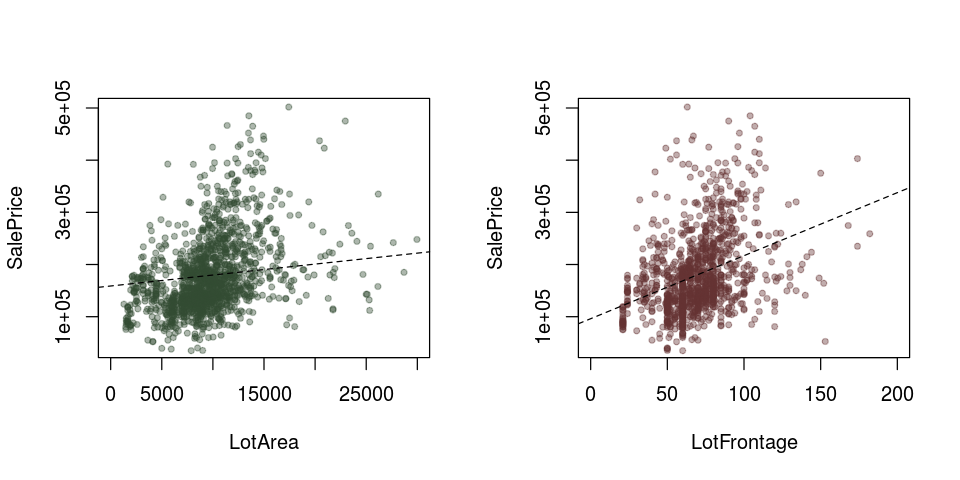

In [9]:
options(repr.plot.width = 8, repr.plot.height = 4)

# change layout to plot 1 x 2 plots
par(mfrow = c(1, 2))
plot(SalePrice ~ LotArea, data = house, xlim = c(0, 3E4), 
     ylim = c(4E4, 5E5), pch = 20, col = rgb(.2, .3, .2, .4))
# Adds a line using linear regression
abline(lm(SalePrice ~ LotArea, data = house), lty = 2)
plot(SalePrice ~ LotFrontage, data = house, xlim = c(0, 200), 
     ylim = c(4E4, 5E5), pch = 20, col = rgb(.4, .2, .2, .4))
abline(lm(SalePrice ~ LotFrontage, data = house), lty = 2)

## Bar plots

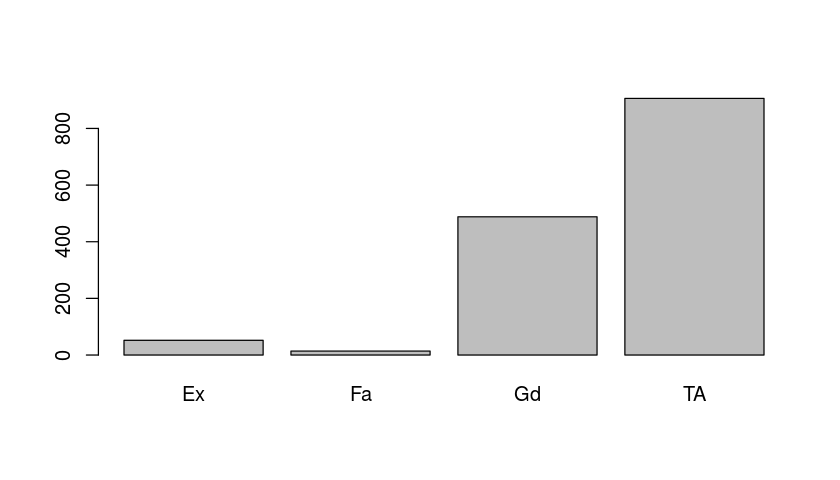

In [12]:
options(repr.plot.width = 7, repr.plot.height = 4)
# Barplots using count data
barplot(with(house, table(ExterQual)))

## Stacked `barplot` with `legend`

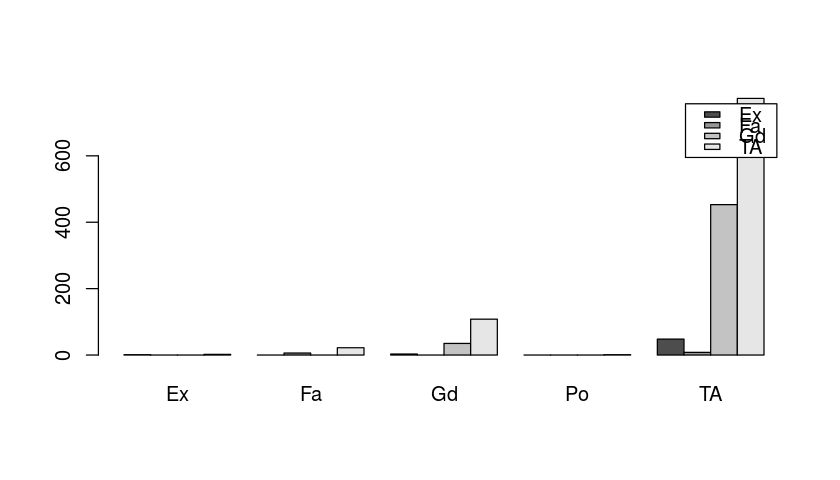

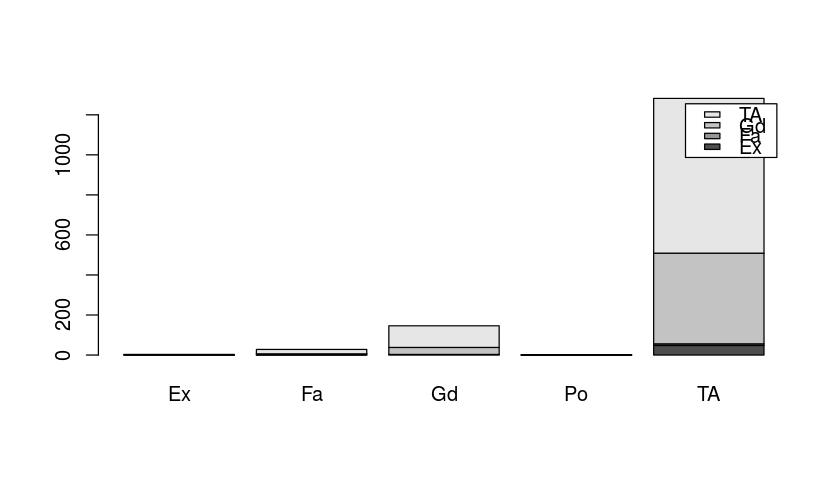

In [16]:
# grouped and stacked bar charts
barplot(with(house, table(ExterQual, ExterCond)), beside = TRUE, legend = TRUE)
barplot(with(house, table(ExterQual, ExterCond)), beside = FALSE, legend = TRUE)

## Box plots

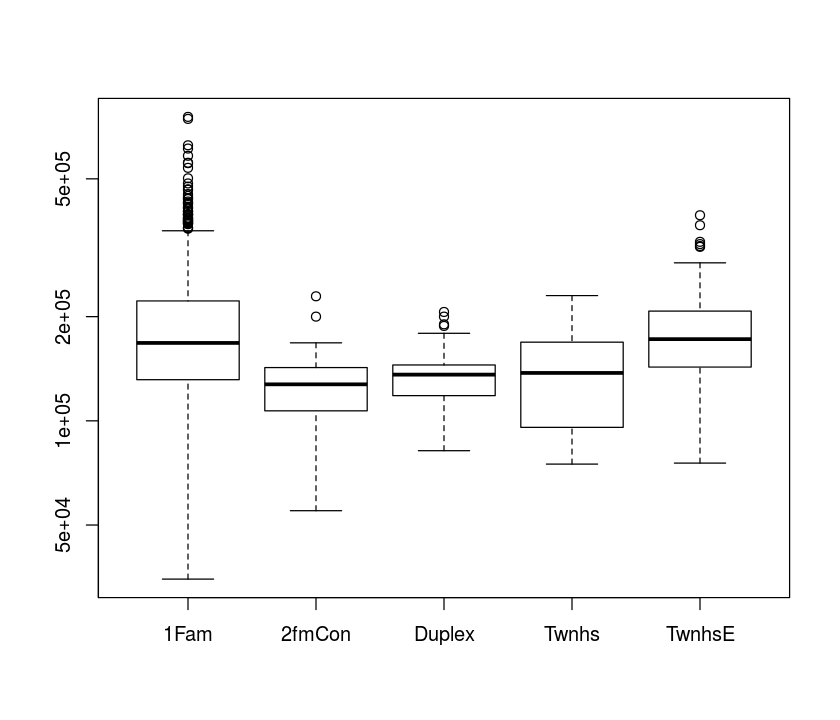

In [35]:
options(repr.plot.width = 7, repr.plot.height = 6)

# Boxplot with log y-axes
with(house, boxplot(SalePrice ~ BldgType, log = "y"))

### Plotting with functions of variables

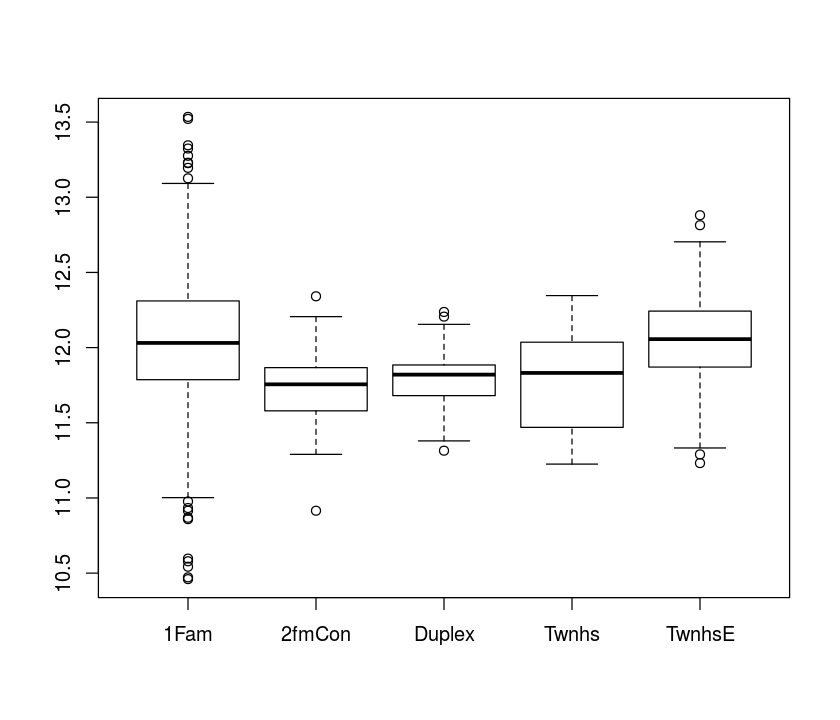

In [36]:
# Parameters in plots can also be log-transformed
with(house, boxplot(log(SalePrice) ~ BldgType))

### Boxplots of more than one variable

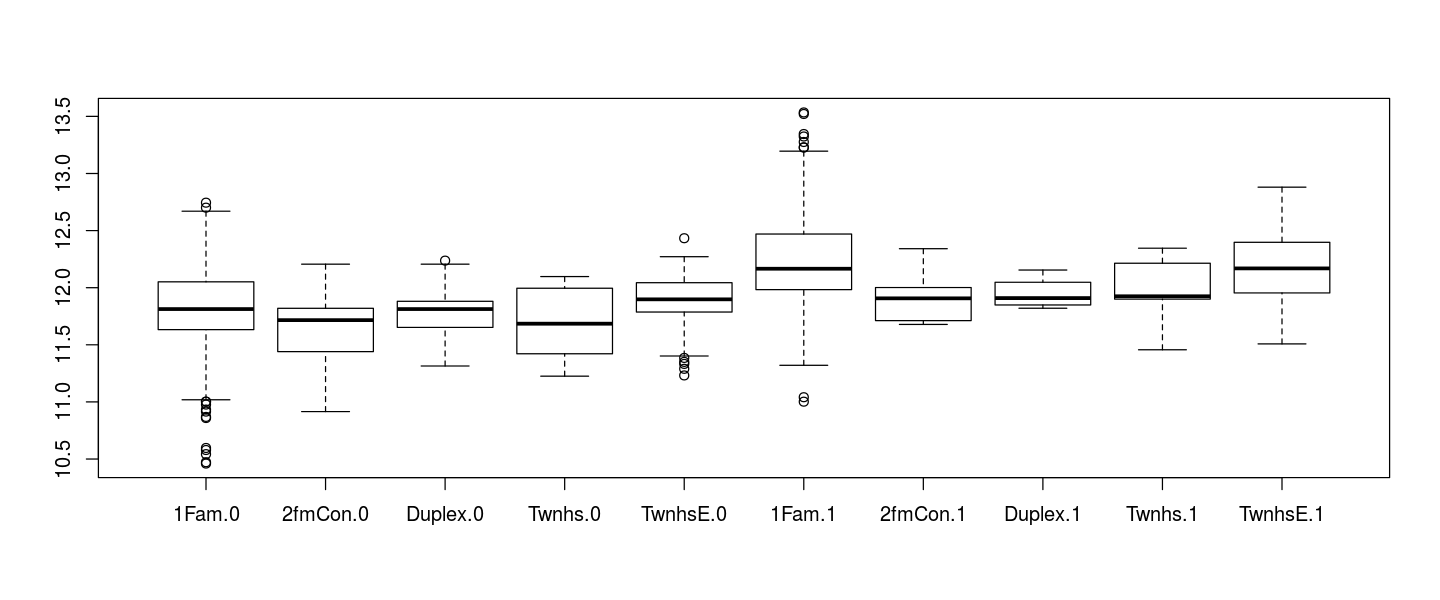

In [43]:
options(repr.plot.width = 12, repr.plot.height = 5)
with(house, boxplot(log(SalePrice) ~ BldgType + I(1*(Fireplaces > 0))))

### Arranging plots with the `layout` function

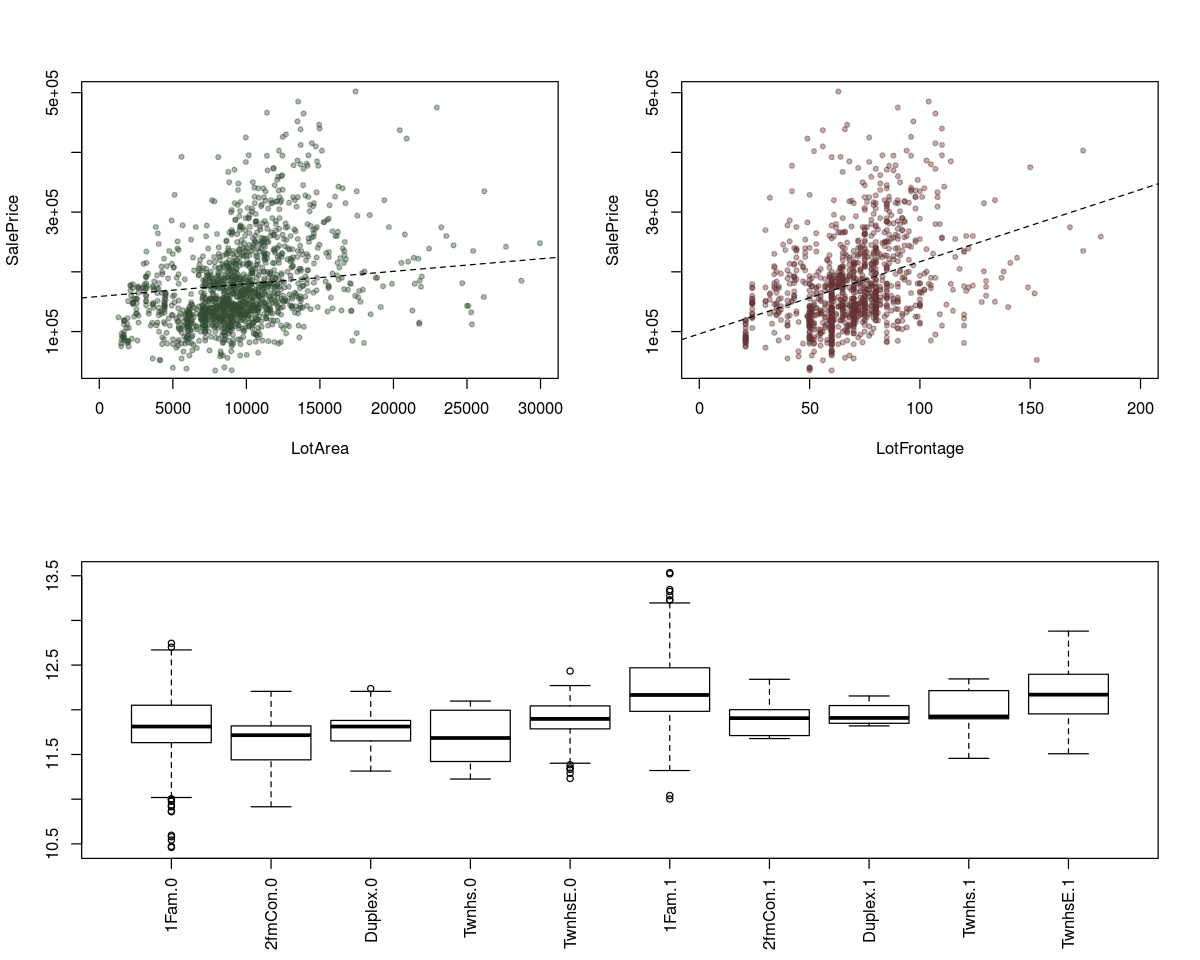

In [139]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Using the layout function to compose plots:
layout(matrix(c(1, 2, 3, 3), nrow = 2, byrow = TRUE))
plot(SalePrice ~ LotArea, data = house, xlim = c(0, 3E4), 
     ylim = c(4E4, 5E5), pch = 20, col = rgb(.2, .3, .2, .4))
# Adds a line using linear regression
abline(lm(SalePrice ~ LotArea, data = house), lty = 2)
plot(SalePrice ~ LotFrontage, data = house, xlim = c(0, 200), 
     ylim = c(4E4, 5E5), pch = 20, col = rgb(.4, .2, .2, .4))
abline(lm(SalePrice ~ LotFrontage, data = house), lty = 2)

# Boxplot, the las parameter controls the orientation of the `x` axis labels
with(house, boxplot(log(SalePrice) ~ BldgType + I(1*(Fireplaces > 0)), las = 3))

# Exercise 2.6

**Question 1**

Use the `par` function to create a $2 \times 2$ plot environment (Hint: `mfrow`). Then use the **`hist` function to create a histogram** of the `SalePrice` from the `house` table as the first plot in your $2 \times 2$ graphic.

**Question 2**

The **`density`** function computes the kernel density of a parameter. The `plot` function can create plots from the output of the `density` function. Create a density plot as the second plot in your $2 \times 2$ graphic.

**Question 3**

The **`ecdf` function creates an empirical distribution from a vector input**. The plot function can create charts from the output of the `ecdf` function. Create a plot of the **ecdf** of the `SalePrice` as the third item your $2 \times 2$ graphic.

**Question 4**

Create a `boxplot` of **`log(SalePrice) ~ LotShape`** as the fourth chart in your $2 \times 2$ graphic.

**Question 5**

Use the `X11` function to create a new window and the `layout` function to create a 3-chart graphic with a single chart on the left and two charts on the right - one above each other where both charts on the right have the same combined height as the chart on the left.

**Question 6**

Use the `hist` function to create a histogram of `LotArea` from the `house` table as the plot on the left.

**Question 7**

Use the `hist` function to create a histogram of `YearBuilt` from the `house` table as the plot on the top right of your layout graphic.

**Question 8**

Use the create a frequency table of `CentralAir` from the `house` table using the `table` function, then use this to create a `barplot` with title `"Bar chart of air conditioning counts"` plot on the bottom right of your layout graphic.